# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
DATA_FOLDER = 'data'

training_file = DATA_FOLDER + '/train.p'
testing_file = DATA_FOLDER + '/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_non_norm, y_train = train['features'], train['labels']
X_test_non_norm, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_non_norm)

# TODO: Number of testing examples.
n_test = len(X_test_non_norm)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_non_norm[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

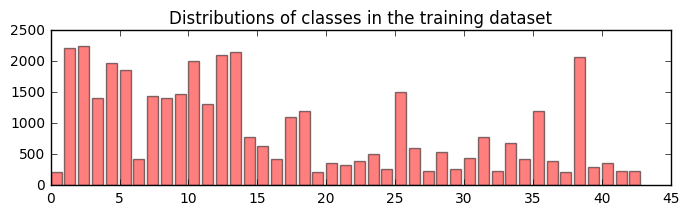

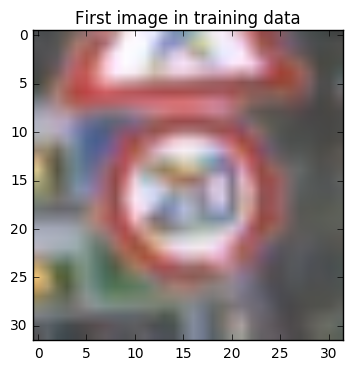

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

# Show the distribution of training data
train_classes = np.bincount(y_train)
plt.figure(figsize=(8, 2))
plt.bar(range(n_classes), train_classes, label="train", color="r", alpha=0.5)
plt.title("Distributions of classes in the training dataset")
plt.show()

# Display the first image in the test set
plt.title("First image in training data")
plt.imshow(X_train_non_norm[0])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
def normalize_image(image):
    '''Normalizes a single image'''
    return np.float32((image/255.0)-0.5)


def normalize_data(data_set):
    '''Normalizes the array of data passed'''
    intermed = []
    for i in range(len(data_set)):
        intermed.append(normalize_image(data_set[i]))
    return np.array(intermed)

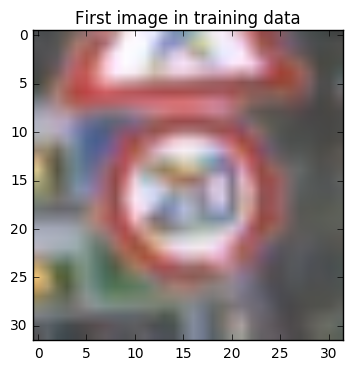

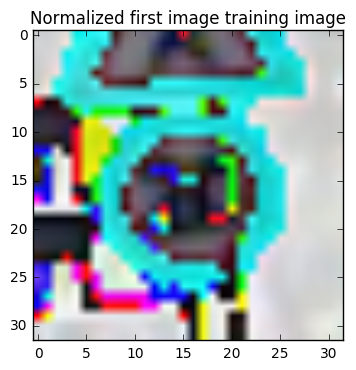

In [5]:
# Normalize all data here:        
X_train = normalize_data(X_train_non_norm)
X_test = normalize_data(X_test_non_norm)

# Display the first image in the test set
plt.title("First image in training data")
plt.imshow(X_train_non_norm[0])
plt.show()
print()
plt.title("Normalized first image training image")
plt.imshow(X_train[0])

#### Create test data for underrepresented classes by rotating images

Create the function to generate data.

In [6]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
import scipy.ndimage
import random
from sklearn import model_selection

def gen_test_data_for_under_rep_classes():
    """
    For classes that are underrepresented generate more training data for those classes
    """    
    # Generate additional data for underrepresented classes
    print("Generating additional data..")
    global y_train
    global X_train

    # Find the maximum number of training classes
    inputs_per_class = np.bincount(y_train)

    max_inputs = np.max(inputs_per_class)

    # Rotate data according to the degrees in this list to
    # convert one test image to a new test image
    angles = [-10, 10, -8, 8, -6, 6, -4, 4, -2, 2, -1, 1]

    ANGLES_LEN = len(angles)

    for i in range(len(train_classes)):

        input_ratio = int(max_inputs / inputs_per_class[i])

        print('*', end="") # Show progress

        if input_ratio > 1: # Underrepresented class.

            new_features = []
            new_labels = []
            mask = np.where(y_train == i)

            for j in range(input_ratio):
                for feature in X_train[mask]:
                    index = random.randint(0, ANGLES_LEN-1)
                    new_features.append(scipy.ndimage.rotate(feature, angles[index], reshape=False))
                    new_labels.append(i)

            X_train = np.append(X_train, new_features, axis=0)
            y_train = np.append(y_train, new_labels, axis=0)

    print('\nRandomizing data')

    X_train, valid_features, y_train, valid_labels = model_selection.train_test_split(
       X_train,
       y_train,
       test_size=0.2,
       random_state=832289
    )

    print('Data generated')

Run the function and show new distribution.

Generating additional data..
*******************************************
Randomizing data
Data generated


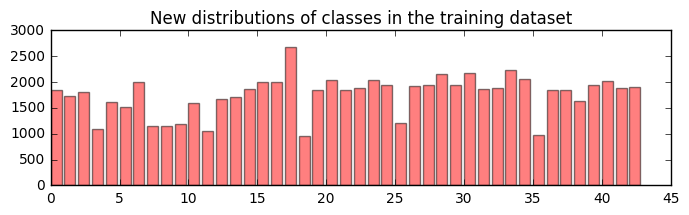

In [7]:
# Generate the new test data
gen_test_data_for_under_rep_classes()

# Show new distribution of training data
train_classes = np.bincount(y_train)
plt.figure(figsize=(8, 2))
plt.bar(range(n_classes), train_classes, label="train", color="r", alpha=0.5)
plt.title("New distributions of classes in the training dataset")
plt.show()

### Split Data into Training, Validation and Testing Sets

In [8]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

X_train, y_train = shuffle(X_train, y_train)

n_train = len(X_train)
n_test = len(X_test)
n_validate = len(X_validation)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validate)

Number of training examples = 64338
Number of testing examples = 12630
Number of validation examples = 11354


### Model Architecture

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x, dropout):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2_drop = tf.nn.dropout(fc2, dropout)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    
    return logits

### Features and Lables

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)

### Training Pipeline

In [11]:
LEARNING_RATE = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [12]:
EVAL_DROPOUT = 1.0

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:EVAL_DROPOUT})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

#### Utility functions to allow the training the ability to look for previous sessions:

In [13]:
from os import listdir

def is_saved_session(file_prefix):
    """
    Checks to see if there is a saved session 
    file_prefix: The prefix for the saved session file
    returns true if a file with the session exists or false otherwise
    """
    for file in listdir('.'):
        if file.startswith(file_prefix):
            return True
    return False


def restore_previous_session(session, saver, file_name):
    """
    Restores the data for a previous session if found
    session: The TensorFlow session to be restored
    saver: The TensorFlow saver for the session
    file_name: The name of the file for the session
    """
    if is_saved_session(file_name):
        print("Found saved session\n")
        file_location_path = './' + file_name
        saver.restore(session, file_location_path)

#### Do Training of the Model

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

EPOCHS = 40
BATCH_SIZE = 128
SAVE_SESSION_FILE = 'traffic-sign'
SAVE_SESSION_FILE_LOC = './' + SAVE_SESSION_FILE
TRAIN_DROPOUT = 0.75 # Dropout, probability to keep units


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    restore_previous_session(sess, saver, SAVE_SESSION_FILE)

    num_examples = len(X_train)
    
    print("Training...")
    print() # Add space between each line
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: TRAIN_DROPOUT})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, SAVE_SESSION_FILE_LOC)
    print("Model saved")

Found saved session

Training...

EPOCH 1 ...
Validation Accuracy = 0.995

EPOCH 2 ...
Validation Accuracy = 0.995

EPOCH 3 ...
Validation Accuracy = 0.996

EPOCH 4 ...
Validation Accuracy = 0.997

EPOCH 5 ...
Validation Accuracy = 0.993

EPOCH 6 ...
Validation Accuracy = 0.996

EPOCH 7 ...
Validation Accuracy = 0.997

EPOCH 8 ...
Validation Accuracy = 0.994

EPOCH 9 ...
Validation Accuracy = 0.996

EPOCH 10 ...
Validation Accuracy = 0.995

EPOCH 11 ...
Validation Accuracy = 0.996

EPOCH 12 ...
Validation Accuracy = 0.996

EPOCH 13 ...
Validation Accuracy = 0.997

EPOCH 14 ...
Validation Accuracy = 0.997

EPOCH 15 ...
Validation Accuracy = 0.997

EPOCH 16 ...
Validation Accuracy = 0.995

EPOCH 17 ...
Validation Accuracy = 0.996

EPOCH 18 ...
Validation Accuracy = 0.996

EPOCH 19 ...
Validation Accuracy = 0.996

EPOCH 20 ...
Validation Accuracy = 0.996

EPOCH 21 ...
Validation Accuracy = 0.995

EPOCH 22 ...
Validation Accuracy = 0.997

EPOCH 23 ...
Validation Accuracy = 0.995

EPOCH 24 

#### Do Testing of the Model

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    restore_previous_session(sess, saver, SAVE_SESSION_FILE)

    print('\n\nTesting...')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Found saved session



Testing...
Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

#### The helper functions for images from internet

In [16]:
def get_resized_image_file(image_file):
    """
    Gets an image resized appropriately to 32x32x3
    image_file: The path to the image file
    returns an image as a numpy array appropriately resized
    """
    SIZE = (32, 32) # New image size
    img = Image.open(image_file)
    img = img.resize(SIZE, Image.ANTIALIAS)
    return np.asarray(img)


def get_image_id_from_filename(image_file):
    """
    Gets the sign id from the name of the file 
    image_file: The path to the image file
    returns the appropriate image id for the sign
    """
    return image_file.split("-")[1].split(".")[0]

### Load and Output the Images

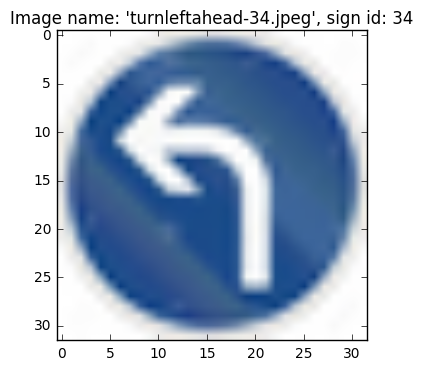

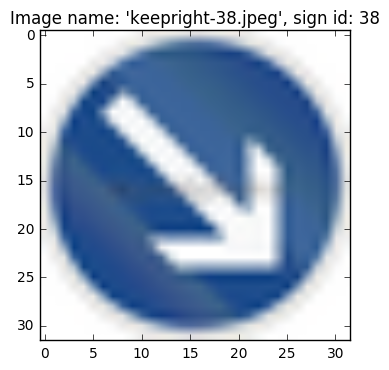

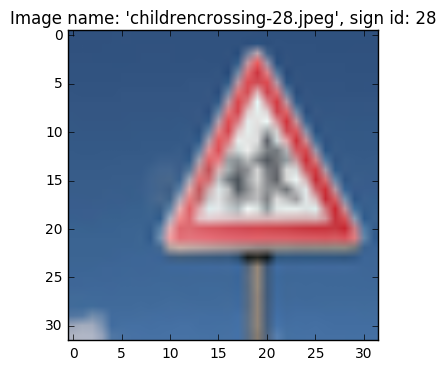

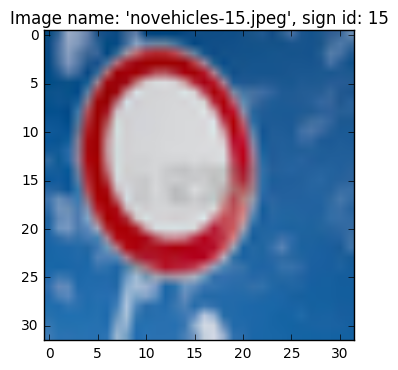

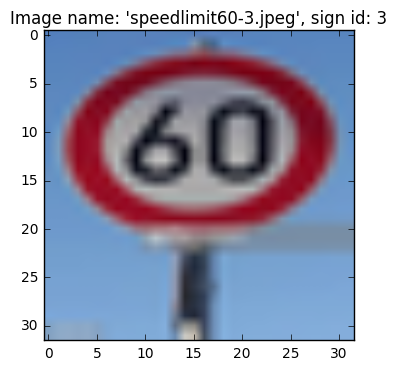

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from os import listdir

JPEG_EXT = '.jpeg'

image_list = []
image_id = []

for file in listdir(DATA_FOLDER):
    if file.endswith(JPEG_EXT):
        print() # Add space between each line
        file_path = DATA_FOLDER + '/' + file

        current_image = get_resized_image_file(file_path)
        image_list.append(current_image)

        current_id = get_image_id_from_filename(file_path)
        image_id.append(current_id)
        
        plt.title("Image name: '" + file + "', sign id: " + current_id)    
        plt.imshow(current_image)
        plt.show()
        

### Predict the Sign Type for Each Image

In [18]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

KEEP_PROB = 1.0

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
logits = LeNet(x, keep_prob)
predicted_index = tf.argmax(logits, 1)
actual_index = tf.argmax(one_hot_y, 1)
correct_prediction = tf.equal(predicted_index, actual_index)

# Normalize images    
image_list_norm = normalize_data(image_list)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    restore_previous_session(sess, saver, SAVE_SESSION_FILE)
    
    for i in range(len(image_list_norm)):
        print('Actual Index = ['+image_id[i]+']')
        print('Predicted Index =',sess.run(predicted_index, {x: [image_list_norm[i]],  y:[image_id[i]], keep_prob: KEEP_PROB}))
        print('\n\n')


Found saved session

Actual Index = [34]
Predicted Index = [10]



Actual Index = [38]
Predicted Index = [18]



Actual Index = [28]
Predicted Index = [18]



Actual Index = [15]
Predicted Index = [3]



Actual Index = [3]
Predicted Index = [3]





### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
EVAL_DROPOUT = 1.0
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    restore_previous_session(sess, saver, SAVE_SESSION_FILE)
    
    print('\n\nTesting...')
    test_accuracy = evaluate(image_list_norm, image_id)
    print("Internet Image Test Accuracy = {:.1f}%".format(test_accuracy * 100))

Found saved session



Testing...
Internet Image Test Accuracy = 0.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    restore_previous_session(sess, saver, SAVE_SESSION_FILE)
    
    for i in range(len(image_list)):
        print('Actual Index = ['+image_id[i]+']')
        print('Top softmax probs =',sess.run(top_k, {x: [image_list_norm[i]],  y:[image_id[i]], keep_prob: KEEP_PROB}))
        print('\n\n')

Found saved session

Actual Index = [34]
Top softmax probs = TopKV2(values=array([[ 0.02985654,  0.02904568,  0.02867856,  0.02780264,  0.02663691]], dtype=float32), indices=array([[40, 42, 32, 30, 25]], dtype=int32))



Actual Index = [38]
Top softmax probs = TopKV2(values=array([[ 0.03046964,  0.02746669,  0.0274164 ,  0.02688087,  0.02641506]], dtype=float32), indices=array([[40, 15,  8, 25, 42]], dtype=int32))



Actual Index = [28]
Top softmax probs = TopKV2(values=array([[ 0.02924893,  0.0283641 ,  0.02798295,  0.0262242 ,  0.02618462]], dtype=float32), indices=array([[42, 40, 25, 18, 30]], dtype=int32))



Actual Index = [15]
Top softmax probs = TopKV2(values=array([[ 0.02942308,  0.02848374,  0.02804091,  0.02705644,  0.02664903]], dtype=float32), indices=array([[42, 30, 40, 10, 24]], dtype=int32))



Actual Index = [3]
Top softmax probs = TopKV2(values=array([[ 0.02810557,  0.02724636,  0.02661942,  0.02635353,  0.02602429]], dtype=float32), indices=array([[42, 32, 12, 40,  3]

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 